# Example of parsing nd2 microscopy files into OME-Zarr using Python #

### Alexandros Papagiannakis, 2025 ###
#### MIT License ####

In this Jupyter notebook I provide two examples where the functions stored in the <code> omero_exec.py </code>, the <code> ndtwo_to_python.py </code>, the <code> omezarr_auxliary.py </code> and the <code> omezarr_napari_view.py </code> scripts.
<br>
Specifically, two examples with two different .nd2 files are shown. In the first example, the .nd2 file has a TCYX iteration axis, with 65 timepoints, 2 channels, and 2048x2048 images. In the second example, the .nd2 file has a TPCYX iteration axis, with 49 timepoints, 5 XY positions, 2 channels, and 2048x2048 images. 
<br>
<br>
Two different functions are applied to parse each .nd2 file. The first function called <code> ndtwo_to_omezarr(source_path, destination_path, time_interval_sec) </code> does not split the XY positions, and generates a multiscaled OME-Zarr pyramid. The second function function <code> ndtwo_to_omezarr_per_position(source_path, destination_path, time_interval_sec) </code> generates an OME-Zarr pyramid per XY position.

In [1]:
import omero_exec as exec # type: ignore
import matplotlib.pyplot as plt
import omezarr_napari_view as napview # type: ignore


### Example 1: {'T': 65, 'C': 2, 'Y': 512, 'X': 512} ### 

In [ ]:
source_path = '...nd2'
destination_path = '...zarr'
exec.ndtwo_to_omezarr(source_path, destination_path, 60)

{'T': 65, 'C': 2, 'Y': 512, 'X': 512}
Array shape (65, 2, 512, 512) is valid, no zero dimensions found.
Using chunks (13, 1, 64, 64) for array of shape (65, 2, 512, 512)
Using axes [{'name': 't', 'type': 'time'}, {'name': 'c', 'type': 'channel'}, {'name': 'y', 'type': 'space'}, {'name': 'x', 'type': 'space'}] for array of shape (65, 2, 512, 512)


/opt/anaconda3/envs/Spirotracker/lib/python3.13/site-packages/zarr/core/group.py:3390: ZarrUserWarning: Object at zarr.json is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


/
├── 0 (65, 2, 512, 512) uint16
├── 1 (65, 2, 256, 256) uint16
├── 2 (65, 2, 128, 128) uint16
├── 3 (65, 2, 64, 64) uint16
└── 4 (65, 2, 32, 32) uint16


adding calibrations [60, 1, 0.10666666666666667, 0.10666666666666667]
adding omero metadata {'channels': [{'label': 'Dapi', 'color': '0000FF', 'emissionWavelength': 481.0, 'excitationWavelength': 405.0, 'active': True}, {'label': 'GFP', 'color': '00FF00', 'emissionWavelength': 535.0, 'excitationWavelength': 488.0, 'active': True}], 'rdefs': {'defaultT': 0, 'defaultZ': 0}}
OME-Zarr written successfully.


In [3]:
image_arrays = exec.read_omezarr(destination_path)
print(image_arrays.shape)

(65, 2, 512, 512)


### Example 2: {'T': 49, 'P': 5, 'C': 2, 'Y': 2048, 'X': 2048} ###

In [ ]:
source_path = '...nd2'
destination_path = '...zarr'
exec.ndtwo_to_omezarr_per_position(source_path, destination_path, 60)

{'T': 49, 'P': 5, 'C': 2, 'Y': 2048, 'X': 2048}
Array shape (49, 5, 2, 2048, 2048) is valid, no zero dimensions found.
Using axes [{'name': 't', 'type': 'time'}, {'name': 'p', 'type': 'position'}, {'name': 'c', 'type': 'channel'}, {'name': 'y', 'type': 'space'}, {'name': 'x', 'type': 'space'}] for array of shape (49, 5, 2, 2048, 2048)
Detected 5 positions at axis index 1
adding calibrations [60, 1, 0.064803672866409, 0.064803672866409]
adding omero metadata {'channels': [{'label': 'Phase', 'color': 'FFFFFF', 'emissionWavelength': 583.0, 'excitationWavelength': None, 'active': True}, {'label': 'EGFP', 'color': '00FF00', 'emissionWavelength': 583.0, 'excitationWavelength': None, 'active': True}], 'rdefs': {'defaultT': 0, 'defaultZ': 0}}
adding calibrations [60, 1, 0.064803672866409, 0.064803672866409]
adding omero metadata {'channels': [{'label': 'Phase', 'color': 'FFFFFF', 'emissionWavelength': 583.0, 'excitationWavelength': None, 'active': True}, {'label': 'EGFP', 'color': '00FF00', 'e

/opt/anaconda3/envs/Spirotracker/lib/python3.13/site-packages/zarr/core/group.py:3390: ZarrUserWarning: Object at zarr.json is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


/
├── 0
│   ├── 0 (49, 2, 2048, 2048) uint16
│   ├── 1 (49, 2, 1024, 1024) uint16
│   ├── 2 (49, 2, 512, 512) uint16
│   ├── 3 (49, 2, 256, 256) uint16
│   └── 4 (49, 2, 128, 128) uint16
├── 1
│   ├── 0 (49, 2, 2048, 2048) uint16
│   ├── 1 (49, 2, 1024, 1024) uint16
│   ├── 2 (49, 2, 512, 512) uint16
│   ├── 3 (49, 2, 256, 256) uint16
│   └── 4 (49, 2, 128, 128) uint16
├── 2
│   ├── 0 (49, 2, 2048, 2048) uint16
│   ├── 1 (49, 2, 1024, 1024) uint16
│   ├── 2 (49, 2, 512, 512) uint16
│   ├── 3 (49, 2, 256, 256) uint16
│   └── 4 (49, 2, 128, 128) uint16
├── 3
│   ├── 0 (49, 2, 2048, 2048) uint16
│   ├── 1 (49, 2, 1024, 1024) uint16
│   ├── 2 (49, 2, 512, 512) uint16
│   ├── 3 (49, 2, 256, 256) uint16
│   └── 4 (49, 2, 128, 128) uint16
└── 4
    ├── 0 (49, 2, 2048, 2048) uint16
    ├── 1 (49, 2, 1024, 1024) uint16
    ├── 2 (49, 2, 512, 512) uint16
    ├── 3 (49, 2, 256, 256) uint16
    └── 4 (49, 2, 128, 128) uint16


OME-Zarr written successfully per position. You can now open it in Napari.


['p', 't', 'c', 'y', 'x']
(5, 49, 2, 2048, 2048)


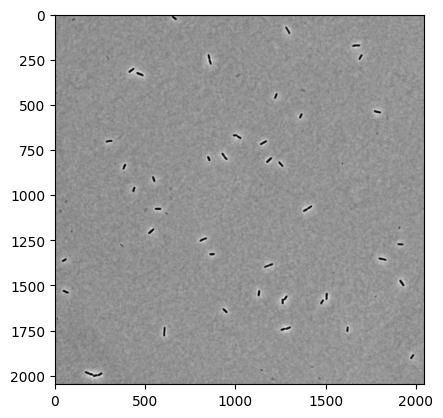

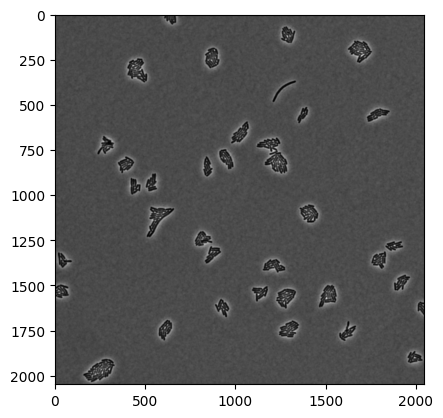

In [5]:
image_arrays, axes = exec.read_all_positions_level0(destination_path)
print(axes)
print(image_arrays.shape)

plt.imshow(image_arrays[1,0,0,:,:], cmap='gray')
plt.show()
plt.imshow(image_arrays[1,40,0,:,:], cmap='gray')
plt.show()

In [6]:
napview.view_xy_position(destination_path, 1)

version mismatch: detected: FormatV04, requested: FormatV05
